In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
netflix = pd.read_csv('all-weeks-countries.csv.')
language = pd.read_csv('all-weeks-global.csv.')

In [17]:
netflix.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-08-21,Films,1,Look Both Ways,NaN,1
1,Argentina,AR,2022-08-21,Films,2,Day Shift,NaN,2
2,Argentina,AR,2022-08-21,Films,3,Bank Robbers: The Last Great Heist,NaN,2
3,Argentina,AR,2022-08-21,Films,4,The Next 365 Days,NaN,1
4,Argentina,AR,2022-08-21,Films,5,The Angry Birds Movie 2,NaN,1


In [18]:
print(netflix)

       country_name country_iso2        week category  weekly_rank  \
0         Argentina           AR  2022-08-21    Films            1   
1         Argentina           AR  2022-08-21    Films            2   
2         Argentina           AR  2022-08-21    Films            3   
3         Argentina           AR  2022-08-21    Films            4   
4         Argentina           AR  2022-08-21    Films            5   
...             ...          ...         ...      ...          ...   
112295      Vietnam           VN  2021-07-04       TV            6   
112296      Vietnam           VN  2021-07-04       TV            7   
112297      Vietnam           VN  2021-07-04       TV            8   
112298      Vietnam           VN  2021-07-04       TV            9   
112299      Vietnam           VN  2021-07-04       TV           10   

                                show_title                    season_title  \
0                           Look Both Ways                             NaN   
1  

In [19]:
language.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-08-21,Films (English),1,Day Shift,NaN,63390000,2
1,2022-08-21,Films (English),2,Look Both Ways,NaN,48060000,1
2,2022-08-21,Films (English),3,The Next 365 Days,NaN,39310000,1
3,2022-08-21,Films (English),4,Purple Hearts,NaN,23410000,4
4,2022-08-21,Films (English),5,Untold: The Girlfriend Who Didn't Exist,NaN,20050000,1


In [20]:
print(language)

            week          category  weekly_rank  \
0     2022-08-21   Films (English)            1   
1     2022-08-21   Films (English)            2   
2     2022-08-21   Films (English)            3   
3     2022-08-21   Films (English)            4   
4     2022-08-21   Films (English)            5   
...          ...               ...          ...   
2395  2021-07-04  TV (Non-English)            6   
2396  2021-07-04  TV (Non-English)            7   
2397  2021-07-04  TV (Non-English)            8   
2398  2021-07-04  TV (Non-English)            9   
2399  2021-07-04  TV (Non-English)           10   

                                   show_title                  season_title  \
0                                   Day Shift                           NaN   
1                              Look Both Ways                           NaN   
2                           The Next 365 Days                           NaN   
3                               Purple Hearts                          

In [21]:
language_rename = language.rename(columns={'category': 'language'})

replacement_map = {'Films (English)': 'English', 'Films (Non-English)' : 'Non-English', 'TV (English)': 'English','TV (Non-English)': 'Non-English'}
# Apply the replacement to the 'Category' column
language_rename['language'] = language_rename['language'].replace(replacement_map)
language_rename.head()

,week,language,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-08-21,English,1,Day Shift,NaN,63390000,2
1,2022-08-21,English,2,Look Both Ways,NaN,48060000,1
2,2022-08-21,English,3,The Next 365 Days,NaN,39310000,1
3,2022-08-21,English,4,Purple Hearts,NaN,23410000,4
4,2022-08-21,English,5,Untold: The Girlfriend Who Didn't Exist,NaN,20050000,1


In [23]:
lang = language_rename[['language','show_title']]
lang.head()

,language,show_title
0,English,Day Shift
1,English,Look Both Ways
2,English,The Next 365 Days
3,English,Purple Hearts
4,English,Untold: The Girlfriend Who Didn't Exist


In [24]:
lang = lang.drop_duplicates(subset="show_title", keep="first")
lang.head()

,language,show_title
0,English,Day Shift
1,English,Look Both Ways
2,English,The Next 365 Days
3,English,Purple Hearts
4,English,Untold: The Girlfriend Who Didn't Exist


In [25]:
merged = netflix.merge(lang[['show_title', 'language']],on='show_title',how='left')
merged.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10,language
0,Argentina,AR,2022-08-21,Films,1,Look Both Ways,NaN,1,English
1,Argentina,AR,2022-08-21,Films,2,Day Shift,NaN,2,English
2,Argentina,AR,2022-08-21,Films,3,Bank Robbers: The Last Great Heist,NaN,2,Non-English
3,Argentina,AR,2022-08-21,Films,4,The Next 365 Days,NaN,1,English
4,Argentina,AR,2022-08-21,Films,5,The Angry Birds Movie 2,NaN,1,English


In [26]:
merged_cleaned = merged.drop('season_title', axis=1)
merged_cleaned.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,cumulative_weeks_in_top_10,language
0,Argentina,AR,2022-08-21,Films,1,Look Both Ways,1,English
1,Argentina,AR,2022-08-21,Films,2,Day Shift,2,English
2,Argentina,AR,2022-08-21,Films,3,Bank Robbers: The Last Great Heist,2,Non-English
3,Argentina,AR,2022-08-21,Films,4,The Next 365 Days,1,English
4,Argentina,AR,2022-08-21,Films,5,The Angry Birds Movie 2,1,English


In [27]:
merged_cleaned.describe()

,weekly_rank,cumulative_weeks_in_top_10
count,112300.000000,112300.000000
mean,5.500000,3.468281
std,2.872294,5.518189
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.500000,2.000000
75%,8.000000,3.000000
max,10.000000,60.000000


In [29]:
#show null values in dataframe
merged_cleaned[merged_cleaned['language'].isna()]

,country_name,country_iso2,week,category,weekly_rank,show_title,cumulative_weeks_in_top_10,language
6,Argentina,AR,2022-08-21,Films,7,River Runs Red,1,NaN
28,Argentina,AR,2022-08-14,Films,9,Dreamkatcher,1,NaN
46,Argentina,AR,2022-08-07,Films,7,Primal Fear,1,NaN
49,Argentina,AR,2022-08-07,Films,10,Company of Heroes,1,NaN
65,Argentina,AR,2022-07-31,Films,6,Thursday's Widows,2,NaN
...,...,...,...,...,...,...,...,...
112288,Vietnam,VN,2021-07-04,Films,9,Pokémon Detective Pikachu,1,NaN
112290,Vietnam,VN,2021-07-04,TV,1,Mine,1,NaN
112292,Vietnam,VN,2021-07-04,TV,3,Vincenzo,1,NaN
112295,Vietnam,VN,2021-07-04,TV,6,Reply 1988,1,NaN


In [30]:
#check total number of null values in each column
#high number of null in language because taken from previously larger dataset with more media titles 
merged_cleaned.isnull().sum()

country_name                      0
country_iso2                      0
week                              0
category                          0
weekly_rank                       0
show_title                        0
cumulative_weeks_in_top_10        0
language                      24279
dtype: int64

In [33]:
#drop null values in language
cleaning = merged_cleaned.dropna(subset=['language'])
cleaning.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,cumulative_weeks_in_top_10,language
0,Argentina,AR,2022-08-21,Films,1,Look Both Ways,1,English
1,Argentina,AR,2022-08-21,Films,2,Day Shift,2,English
2,Argentina,AR,2022-08-21,Films,3,Bank Robbers: The Last Great Heist,2,Non-English
3,Argentina,AR,2022-08-21,Films,4,The Next 365 Days,1,English
4,Argentina,AR,2022-08-21,Films,5,The Angry Birds Movie 2,1,English


In [34]:
cleaning.describe()

,weekly_rank,cumulative_weeks_in_top_10
count,88021.000000,88021.000000
mean,5.194488,3.460083
std,2.875168,5.058311
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.000000,2.000000
75%,8.000000,4.000000
max,10.000000,60.000000


In [35]:
cleaning.isnull().sum()

country_name                  0
country_iso2                  0
week                          0
category                      0
weekly_rank                   0
show_title                    0
cumulative_weeks_in_top_10    0
language                      0
dtype: int64

In [1]:
!pip install --upgrade statsmodels

In [2]:
!pip install --upgrade scipy

In [35]:
cleaning.to_csv("top_ten.csv", index=False)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
visual = pd.read_csv("top_ten.csv")

In [38]:
vis = visual[['category', 'language', 'week', 'cumulative_weeks_in_top_10']]

In [39]:
#making pivot table for heatmap
piv_vis = visual.pivot_table(values='cumulative_weeks_in_top_10',index='category',columns='language',aggfunc='mean')
piv_vis

language,English,Non-English
category,,
Films,2.23347,1.935311
TV,3.19912,6.888182


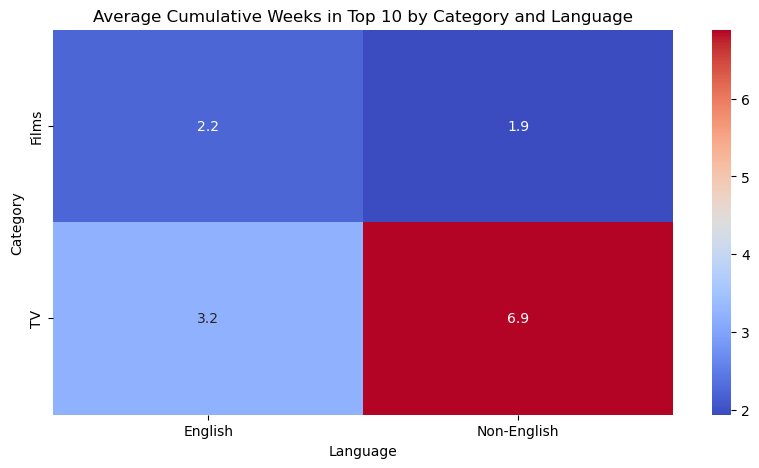

In [40]:
#generate heatmap
plt.figure(figsize=(10,5))
sns.heatmap(piv_vis, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Average Cumulative Weeks in Top 10 by Category and Language")
plt.xlabel("Language")
plt.ylabel("Category")
plt.show()

In [53]:
!pip install statsmodels

In [3]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv("top_ten.csv")

#need to convert date format to numeric for regression
df["week"] = pd.to_datetime(df["week"])
df["week_"] = df["week"].rank(method="dense").astype(int)

y = df["cumulative_weeks_in_top_10"]
x = df[["week_", "weekly_rank", "category", "language"]]

#making dummies for categorical variables (using one-hot encoding)
x = pd.get_dummies(x, drop_first=True)
#convert to numeric values
x = x.astype(float)
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     cumulative_weeks_in_top_10   R-squared:                       0.107
Model:                                    OLS   Adj. R-squared:                  0.107
Method:                         Least Squares   F-statistic:                     2639.
Date:                        Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                                00:14:10   Log-Likelihood:            -2.6260e+05
No. Observations:                       88021   AIC:                         5.252e+05
Df Residuals:                           88016   BIC:                         5.252e+05
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

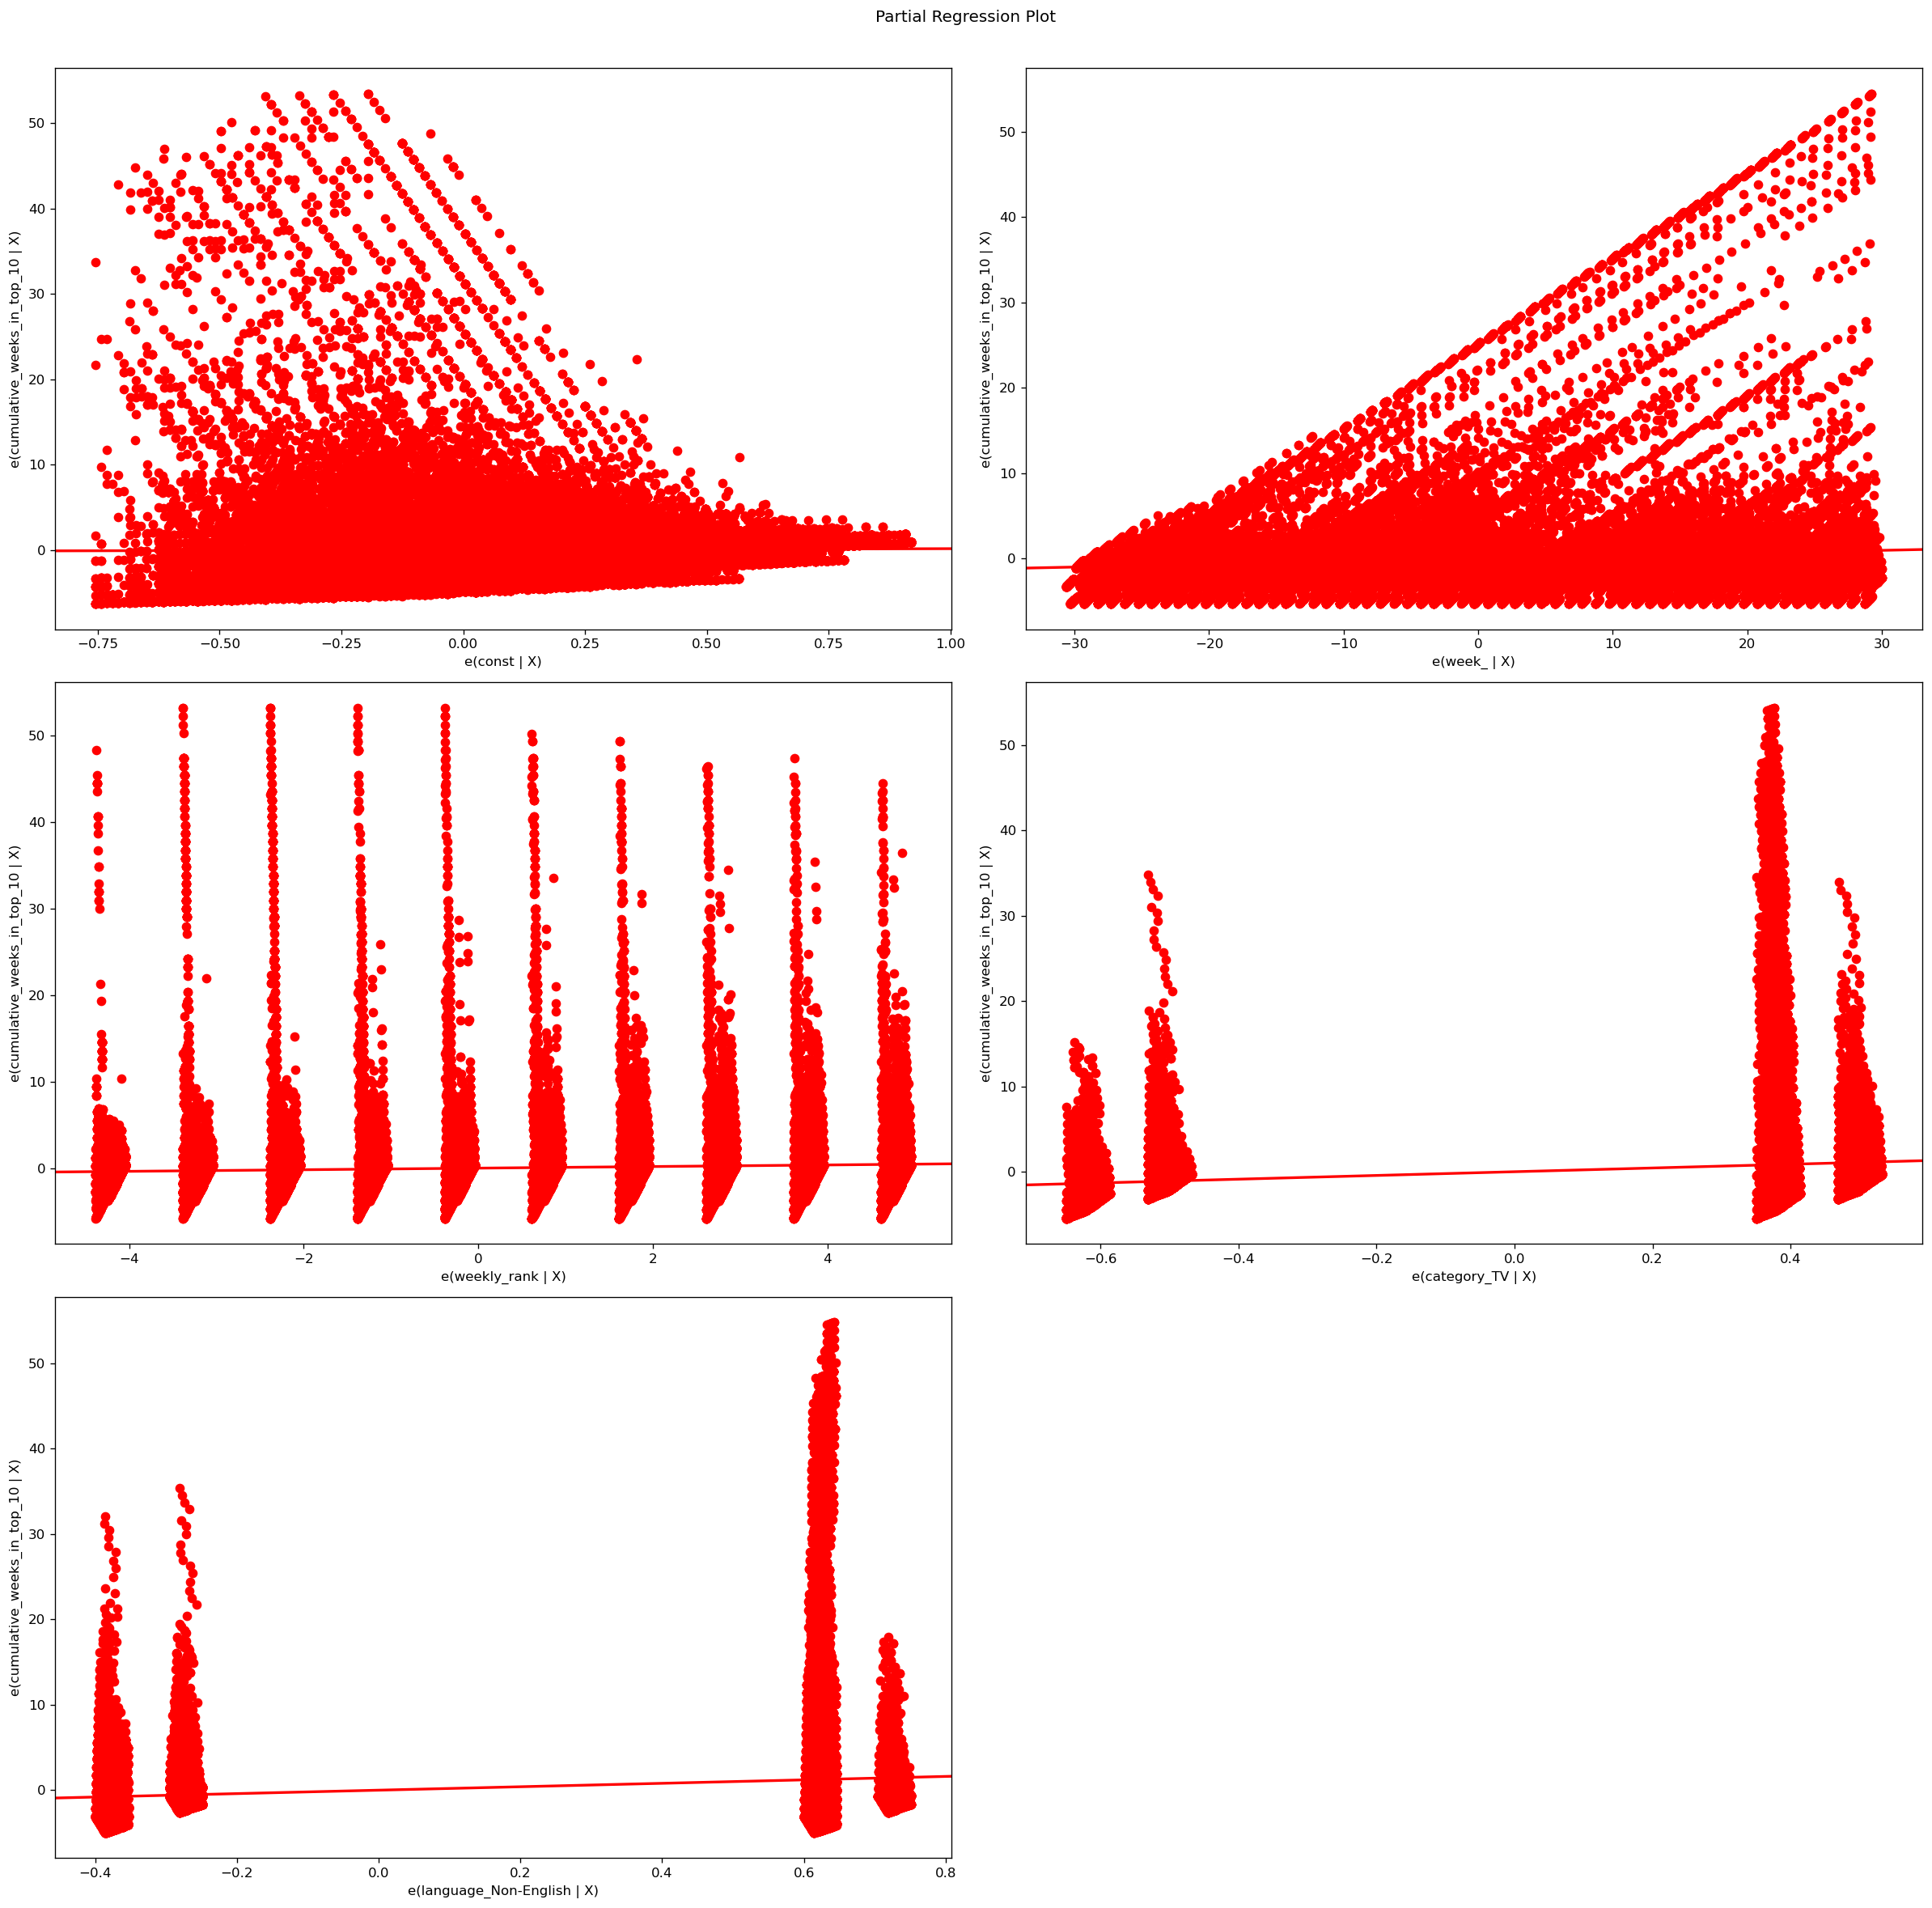

In [4]:
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from statsmodels.graphics.regressionplots import plot_partregress_grid

#setting parameters the change the line and plot color to red
fig = plt.figure(figsize=(20, 20), dpi=120)
plot_partregress_grid(model, fig=fig)
for ax in fig.get_axes():
    for line in ax.lines:
        line.set_color("red")
        line.set_linewidth(2)
    for p in ax.collections:   
        p.set_color("red")
plt.show()


In [5]:
coefficients = model.params
#Don't need constant coefficient
coefficients = coefficients.drop("const")
#sorting importance order highest to lowest
coefficients= coefficients.abs().sort_values(ascending=False)
coefficients = pd.DataFrame({"feature": coefficients.index,"importance": coefficients.values})
coefficients

,feature,importance
0,category_TV,2.187403
1,language_Non-English,2.012371
2,weekly_rank,0.092080
3,week_,0.032647


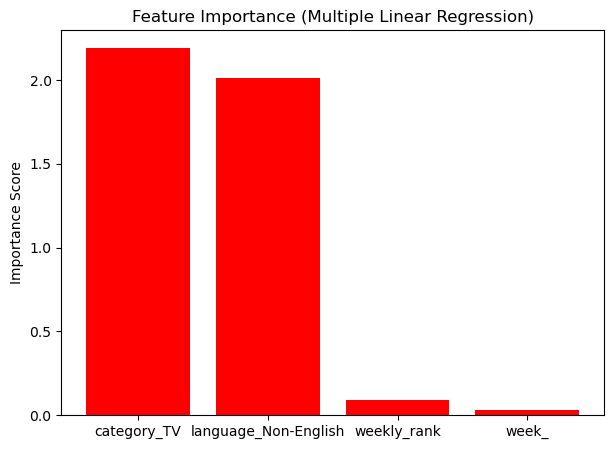

In [6]:
plt.figure(figsize=(7, 5))
plt.bar(coefficients["feature"], coefficients["importance"], color = "red")
plt.ylabel("Importance Score")
plt.title("Feature Importance (Multiple Linear Regression)")
plt.show()